# Classification Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("train.csv")
X = data.drop(columns = ["diabetes"]).values
y = data['diabetes'].values
data.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [3]:
#Replace zeroes
zero_not_accepted = ['glucose_concentration', 'blood_pressure', 'skin_fold_thickness', 'serum_insulin', 'bmi']

for column in zero_not_accepted: 
    data[column] = data[column].replace(0, np.NaN) #replace all 0 with NaN (doesn't exist)
    mean = int(data[column].mean(skipna=True))
    data[column] = data[column].replace(np.NaN, mean) #replace all NaN with the mean value

# Decision Tree Classifier

In [4]:
from sklearn.tree import DecisionTreeClassifier


X = data.iloc[:,0:9].values
y = data.iloc[:,9].values


XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state=1)

Dt = DecisionTreeClassifier(max_leaf_nodes=9, random_state=1)
Dt.fit(XTrain, yTrain)
yPred = Dt.predict(XTest)

accuracy = Dt.score(XTest, yTest) * 100
print('Accuracy Score:', round(accuracy, 2), '%')


Accuracy Score: 73.98 %


Text(33.0, 0.5, 'Actual')

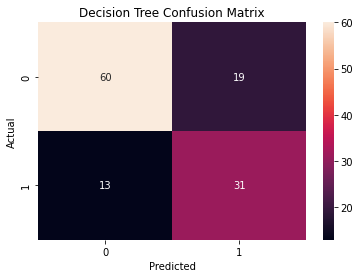

In [5]:
ConfusionM = confusion_matrix(yTest, yPred)
ConfusionM = sns.heatmap(ConfusionM, annot = True)

ConfusionM.set_title('Decision Tree Confusion Matrix')
ConfusionM.set_xlabel('Predicted')
ConfusionM.set_ylabel('Actual')


# Stochastic Gradient Decent

In [6]:
from sklearn.linear_model import SGDClassifier

XTrain, XTest, yTrain, yTest = train_test_split(X, y,test_size = 0.2, random_state=0)

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X, y)
SGDClassifier(max_iter=5)

clf.predict(XTest)

accuracy = clf.score(XTest, yTest) * 100
print('Accuracy Score:', round(accuracy, 2), '%')

Accuracy Score: 70.73 %


C:\Users\sadia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Text(33.0, 0.5, 'Actual')

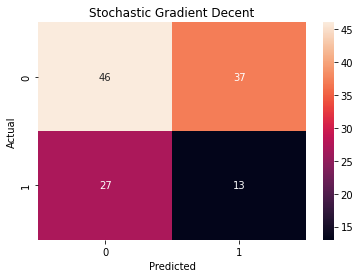

In [7]:
ConfusionM = confusion_matrix(yTest, yPred)
ConfusionM = sns.heatmap(ConfusionM, annot = True)

ConfusionM.set_title('Stochastic Gradient Decent')
ConfusionM.set_xlabel('Predicted')
ConfusionM.set_ylabel('Actual')

# Neural Networks

In [8]:
from sklearn.neural_network import MLPClassifier

Accuracy Score: 69.92 %


Text(33.0, 0.5, 'Actual')

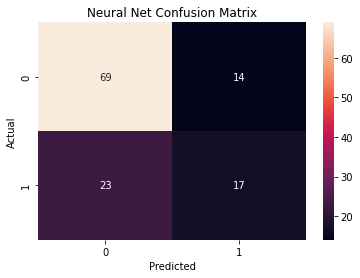

In [9]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state=0)

NeuralNet = MLPClassifier(random_state = 3, max_iter = 9000)

NeuralNet.fit(XTrain, yTrain)
yPred = NeuralNet.predict(XTest)

accuracy = (accuracy_score(yTest, yPred)) * 100
print('Accuracy Score:', round(accuracy, 2), '%')

ConfusionM = confusion_matrix(yTest, yPred)
ConfusionM = sns.heatmap(ConfusionM, annot = True)
ConfusionM.set_title('Neural Net Confusion Matrix')
ConfusionM.set_xlabel('Predicted')
ConfusionM.set_ylabel('Actual')